### FINAL PROJECT - DATA MINING (CS505)
### Fake News Detection

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import itertools
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

In [2]:
#Reading the fake news and true news datasets
fd_fake=pd.read_csv('C:\\Users\\naga2\\Downloads\\DM FINAL Project\\edata\\Fake.csv')
fd_true=pd.read_csv('C:\\Users\\naga2\\Downloads\\DM FINAL Project\\edata\\True.csv')

In [5]:
#printing the first six elements of fake news dataset
fd_fake.head(6)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"


In [6]:
#printing the last five elements of fake news dataset
fd_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [7]:
#printing the first six elements of true news dataset
fd_true.head(6)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"


In [8]:
#printing the last five elements of true news dataset
fd_true.tail()

,title,text,subject,date
21333,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21334,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21335,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21336,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21337,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [9]:
#Inserting a column called "class" for fake and real news dataset to categories fake and true news.
fd_fake["class"] = 0
fd_true["class"] = 1

In [10]:
#finding the shape of data
fd_fake.shape, fd_true.shape

((23481, 5), (21338, 5))

In [11]:
#Inserting a column called "class" for fake and real news dataset to categories fake and true news
fd_fake_manual_testing = fd_fake.tail(10)
for i in range(23480,23470,-1):
    fd_fake.drop([i], axis = 0, inplace = True)
fd_true_manual_testing = fd_true.tail(10)
for i in range(21336,21226,-1):
    fd_true.drop([i], axis = 0, inplace = True)

# Merging the manual testing dataframe in single dataset and save it in a csv file

In [17]:
fd_fake_manual_testing["class"] = 0
fd_true_manual_testing["class"] = 1
#you will get some warnings leave those

C:\Users\naga2\AppData\Local\Temp\ipykernel_20916\626504640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_fake_manual_testing["class"] = 0
C:\Users\naga2\AppData\Local\Temp\ipykernel_20916\626504640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_true_manual_testing["class"] = 1


In [21]:
fd_manual_testing = pd.concat([fd_fake_manual_testing,fd_true_manual_testing], axis = 0)
fd_manual_testing.to_csv("manual_testing.csv")
fd_margin = pd.concat([fd_fake, fd_true], axis =0 )

In [22]:
fd_margin.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [23]:
#"Date","title" and subject columns are not required so I am removing them
fd = fd_margin.drop(["title", "subject","date"], axis = 1)
fd.isnull().sum()

text     0
class    0
dtype: int64

In [24]:
#Randomly shuffling the dataframe
fd= fd.sample(frac = 1)
fd.head()

,text,class
10768,Judge Jeanine Pirro s Opening Statement focuse...,0
17245,"When it comes to limiting our free speech, not...",0
13975,DUBAI (Reuters) - Saudi Arabia aims to start i...,1
22561,21st Century Wire says The military industrial...,0
16708,LONDON (Reuters) - British police ended an arm...,1


In [25]:
fd.reset_index(inplace = True)
fd.drop(["index"], axis = 1, inplace = True)
fd.columns

Index(['text', 'class'], dtype='object')

# Creating a function for converting the text in lowercase, remove the extra space, special chr., ulr and links.

In [26]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [27]:
fd["text"] = fd["text"].apply(wordopt)

In [28]:
#Defining dependent and independent variable as x and y
x = fd["text"]
y= fd["class"]

# Splitting the dataset into training set and testing set

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
#Convert text to vectors
vec = TfidfVectorizer()
xv_train = vec.fit_transform(x_train)
xv_test = vec.transform(x_test)

# Prediction Using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
K = LogisticRegression()
K.fit(xv_train,y_train)

LogisticRegression()

In [32]:
pred_k=K.predict(xv_test)

In [33]:
score=K.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.67%


In [34]:
print(classification_report(y_test, pred_k))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7043
           1       0.98      0.99      0.99      6367

    accuracy                           0.99     13410
   macro avg       0.99      0.99      0.99     13410
weighted avg       0.99      0.99      0.99     13410



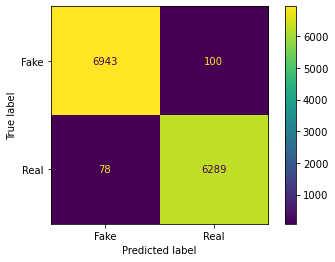

In [35]:
#Plotting the result using confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_k, labels=K.classes_)
conf_disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake','Real'])
conf_disp.plot()

# Prediction Using Decesion Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
Z = DecisionTreeClassifier()
Z.fit(xv_train, y_train)

DecisionTreeClassifier()

In [37]:
pred_z = Z.predict(xv_test)

In [38]:
score=Z.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.57%


In [39]:
print(classification_report(y_test, pred_z))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7043
           1       1.00      1.00      1.00      6367

    accuracy                           1.00     13410
   macro avg       1.00      1.00      1.00     13410
weighted avg       1.00      1.00      1.00     13410



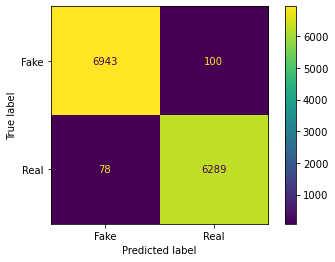

In [41]:
#Plotting the result using confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_k, labels=Z.classes_)
conf_disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake','Real'])
conf_disp.plot()

# Testing With Manual Entry

In [42]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vec.transform(new_x_test)
    pred_k = K.predict(new_xv_test)
    pred_z = Z.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {}".format(output_lable(pred_k[0]),output_lable(pred_z[0])))

In [43]:
#Here I am entering some random data from dataset
news = str(input())
manual_testing(news)

Fox  News  host Sean Hannity spent a whopping 6 seconds covering Tuesday night s election results in which Democrats gained seats across the country in a referendum to Donald Trump and his policies. Hannity, an ardent defender of Trump s, explained the Democratic electoral victories in three of the states by saying,  Those results in Virginia, New Jersey, and New York   not states Donald Trump won.  Hannity devoted 14 words to cover the election results in which Democrats trounced Republicans. In fact, as Shareblue notes,  Democrats flipped 14 seats in the Virginia House of Delegates   the largest Democratic gain in a single election in the state since 1899. Hannity just shrugged it off.Watch:Sean Hannity's election coverage pic.twitter.com/l8DNJbfVRq  John Whitehouse (@existentialfish) November 8, 2017After the hate-march in Charlottesville, Virginia in which tiki-torch carrying bigots terrorized the city while marching in Trump s name, resulting in the death of Heather Heyer, the Com